In [1]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31.0,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0.0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38.0,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30.0,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29.0,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,0\r\n13,145,82,19,110,22.2,0.245,57,0\r\n5

In [2]:
#since this dataset has no columns so we will have to introduce of our own
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']


In [6]:
import pandas as pd
df=pd.read_csv('pima-indians-diabetes.csv',names=col_names)
#names will be used to add column names
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
feature_col=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']


In [9]:
x=df[feature_col]
x #all indenpendent variables

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y=df['label']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [11]:
#train_test_split()
from sklearn.model_selection import train_test_split
#test_size=20% (.2)
#if random_state=0 then same values will be taken in the 80% of the testing data it will not be taken at random
#the accuracy will be same if random_state=0 since the values taken for 80% testing will be the same , by default this is random_state=1
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)


In [12]:
from sklearn.tree import DecisionTreeClassifier


In [13]:
#create the object of decision tree classifier type
#the max_depth by default is 3
cl=DecisionTreeClassifier(criterion="gini",max_depth=3) #maximum depth of 3 layers
cl.fit(xtrain,ytrain)#inserting the xtrain ytrain values into the decision tree


DecisionTreeClassifier(max_depth=3)

In [18]:
ypred=cl.predict(xtest)

In [19]:
#accuracy score and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score


In [21]:
confusion_matrix(ytest,ypred)
#total correct (85+36)/total*100

array([[85, 14],
       [19, 36]])

In [23]:
accuracy_score(ytest,ypred)

0.7857142857142857

In [24]:
from sklearn import tree

[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.125, 0.375, 'x[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.0625, 0.125, 'gini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.375, 'x[1] <= 99.5\ngini = 0.435\nsamples = 172\nvalue = [117, 55]'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 48\nvalue = [43, 5]'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 124\nvalue = [74, 50]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.474\nsamples = 225\nvalue = [87, 138]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\ngini = 0.458\nsamples = 62\nvalue = [40, 22]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.6875, 0.125, 'gini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(0.875, 0.375, 'x[1] <= 154.5\ngini = 0.41\nsamples = 163\nvalue = [4

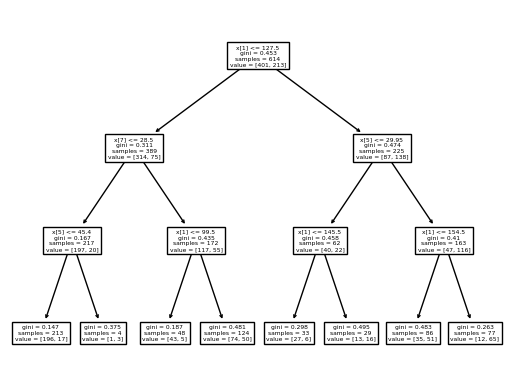

In [25]:
tree.plot_tree(cl) #for displaying the decision tree using the object of decisin tree classifier cl
#the plot_tree method will be used to display the decision tree created by passing the object of decision tree cl

In [28]:
cl1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
cl1.fit(xtrain,ytrain)#inserting the values of xtrain and ytrain

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
ypred=cl1.predict(xtest)

In [31]:
confusion_matrix(ytest,ypred)

array([[88, 11],
       [20, 35]])

In [32]:
accuracy_score(ytest,ypred)

0.7987012987012987

[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[5] <= 26.45\nentropy = 0.707\nsamples = 389\nvalue = [314, 75]'),
 Text(0.125, 0.375, 'x[5] <= 9.1\nentropy = 0.181\nsamples = 110\nvalue = [107, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.079\nsamples = 103\nvalue = [102, 1]'),
 Text(0.375, 0.375, 'x[7] <= 28.5\nentropy = 0.824\nsamples = 279\nvalue = [207, 72]'),
 Text(0.3125, 0.125, 'entropy = 0.568\nsamples = 142\nvalue = [123, 19]'),
 Text(0.4375, 0.125, 'entropy = 0.963\nsamples = 137\nvalue = [84, 53]'),
 Text(0.75, 0.625, 'x[1] <= 166.5\nentropy = 0.963\nsamples = 225\nvalue = [87, 138]'),
 Text(0.625, 0.375, 'x[5] <= 29.95\nentropy = 0.999\nsamples = 159\nvalue = [77, 82]'),
 Text(0.5625, 0.125, 'entropy = 0.867\nsamples = 52\nvalue = [37, 15]'),
 Text(0.6875, 0.125, 'entropy = 0.954\nsamples = 107\nvalue = [40, 67]'),
 Text(0.875, 0.375, 'x[1] <= 172.5

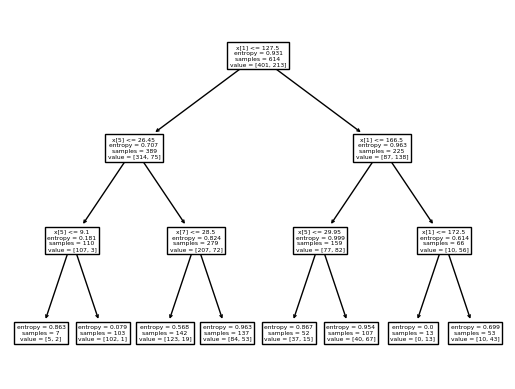

In [33]:
tree.plot_tree(cl1)